In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')

In [8]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [27]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

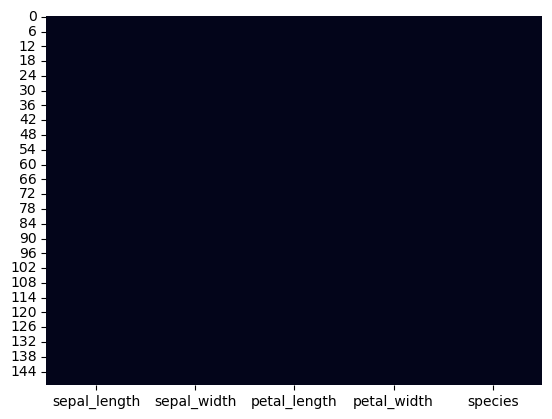

In [18]:
sns.heatmap(iris.isnull(), cbar = False) #cbar is True by default - color bar

In [37]:
pd.concat([iris.dtypes, iris.nunique(), iris.isnull().sum()], axis = 1).rename(columns={0: 'dtypes', 1:'nuniques', 2: 'isna_sum'}).reset_index()

# concatenate horizontally; rename columns for clearer readability

,index,dtypes,nuniques,isna_sum
0,sepal_length,float64,35,0
1,sepal_width,float64,23,0
2,petal_length,float64,43,0
3,petal_width,float64,22,0
4,species,object,3,0


In [38]:
iris.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
#target = species
target = 'species'
irisspecies = iris['species'].unique()

target_dict = {irisspecies[0], irisspecies[1], irisspecies[2]}

In [6]:
iris['species'].unique()
iris['species'].isnull().count()
iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [7]:
spemean = iris.groupby('species').mean()

speminmax = iris.groupby('species').agg({min, max})

pd.concat([spemean, speminmax], axis = 1)

iris.astype('category').describe()

iris.describe()

iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [8]:
def show_countplots(iris,
                    cols,
                    hue=None,
                    dict_values= []):
    N = len(cols)
    
    plt.figure(figsize=(15, N*15))
    
    for i in np.arange(N):
        col = cols[i]
        
        plt.subplot(N, 1, i+1)
        
        plt.title(f'countplot of col="{col}" \n')
                  
        ax = sns.countplot(data = iris, x = col, hue = hue)
        
        plt.tight_layout()
                  
        for container in ax.containers:
            ax.bar_label(container)
                  
        if len(dict_values) == len(cols):
            ax.set_xticklabels(dict_values[i])
                  
    plt.show()

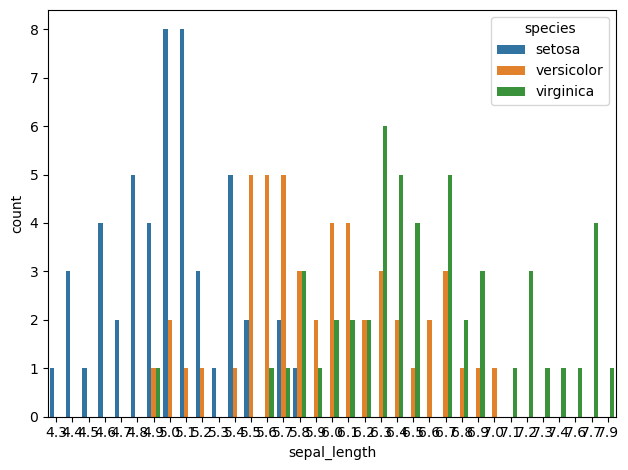

In [9]:
sns.countplot(data = iris, x='sepal_length', hue=target)
plt.tight_layout()

#plt.figure(figsize =(15, len(iris)*15))

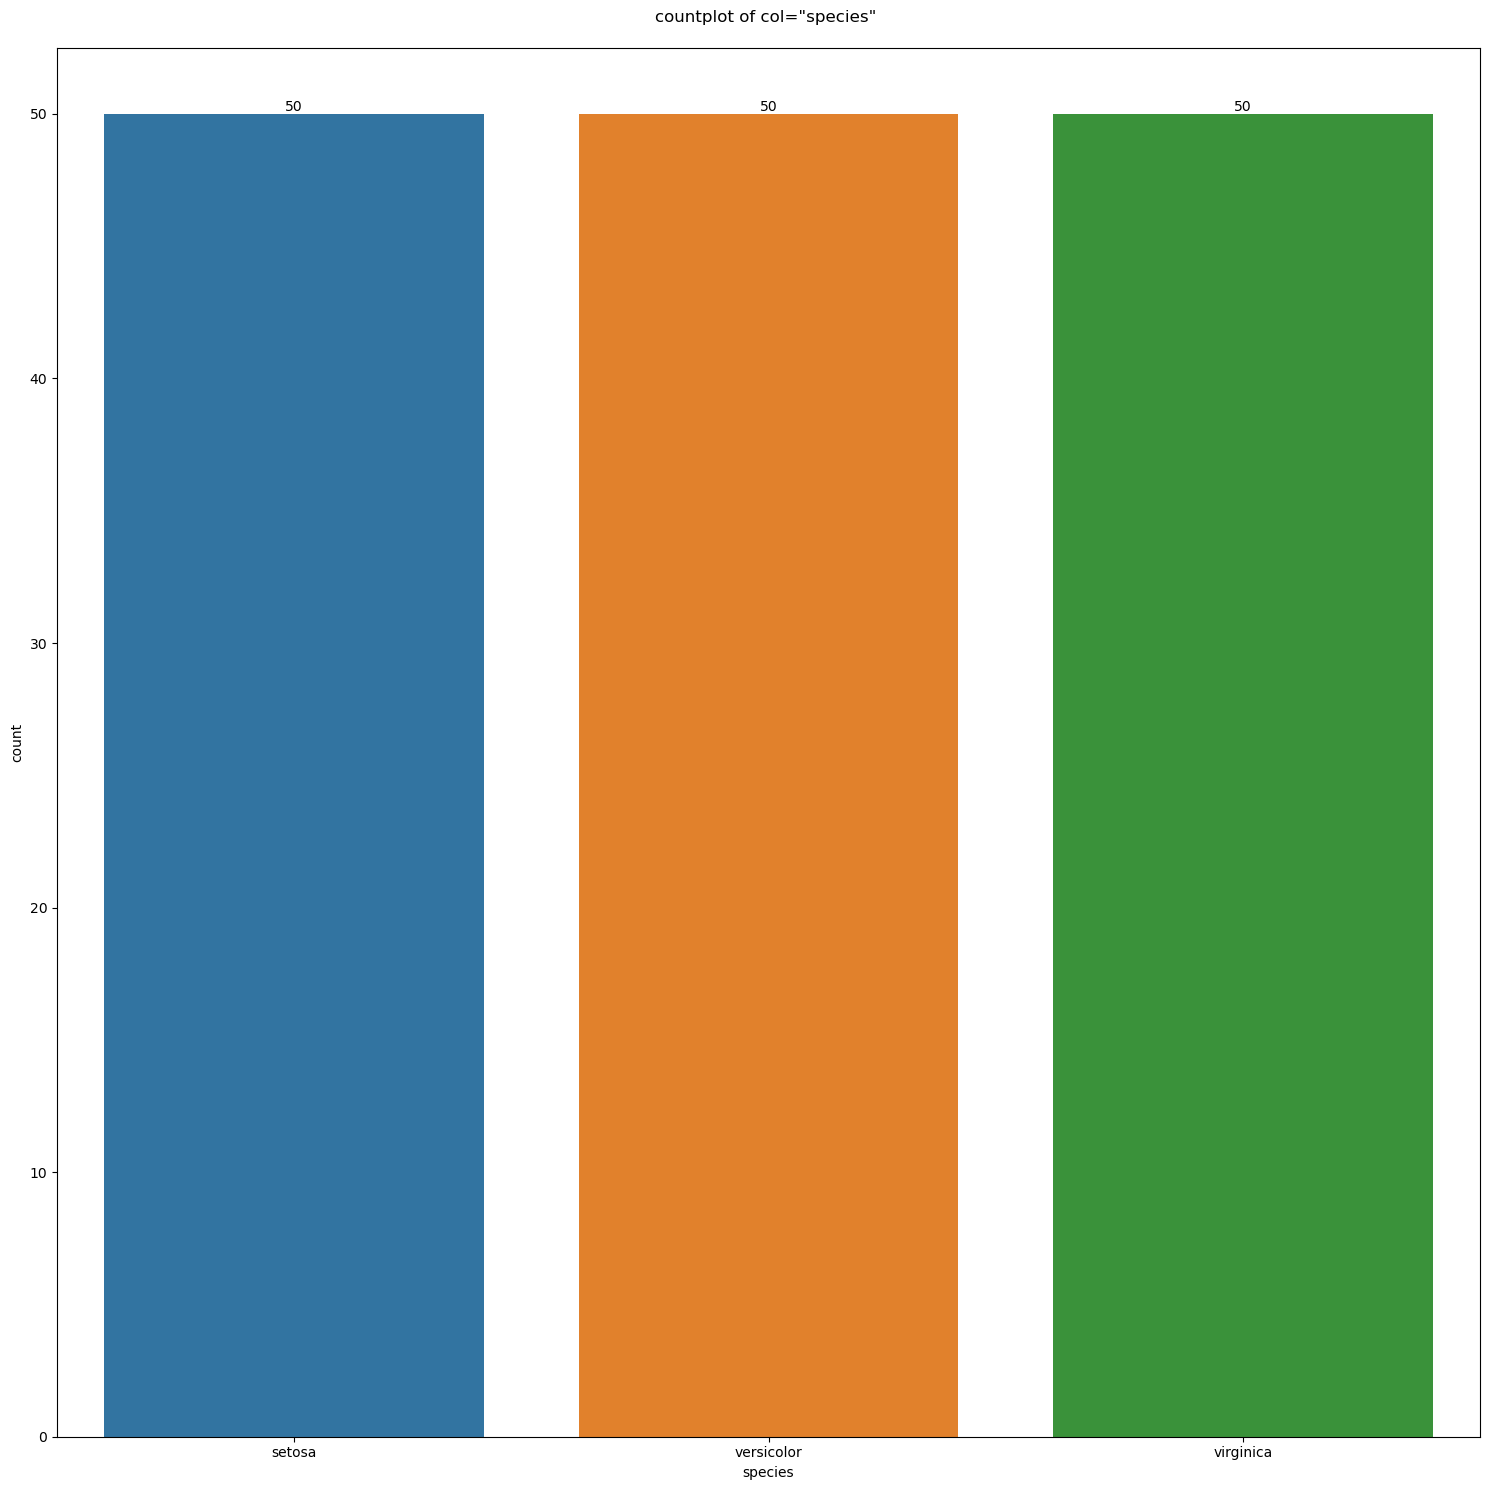

In [132]:
show_countplots(iris,[target], dict_values = target_dict)

In [10]:
features = iris.columns.to_list()
features.remove(target)
print(features)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [11]:
t1 = pd.concat([spemean, speminmax], axis = 1)

len(features)


4

In [15]:
def show_kdeplots(data,cols, hue=None):
    
    N = len(cols)
    
    plt.figure(figsize=(15, 5*N))
    
    for i in np.arange(N):
        col = cols[i]
        
        plt.subplot(N, 1, i+1)
        
        plt.title(f'kdeplot of col="{col}" \n')
        
        ax = sns.kdeplot(data=iris, x=col, hue=hue, fill=True)
        
        plt.tight_layout()
        
    plt.show()

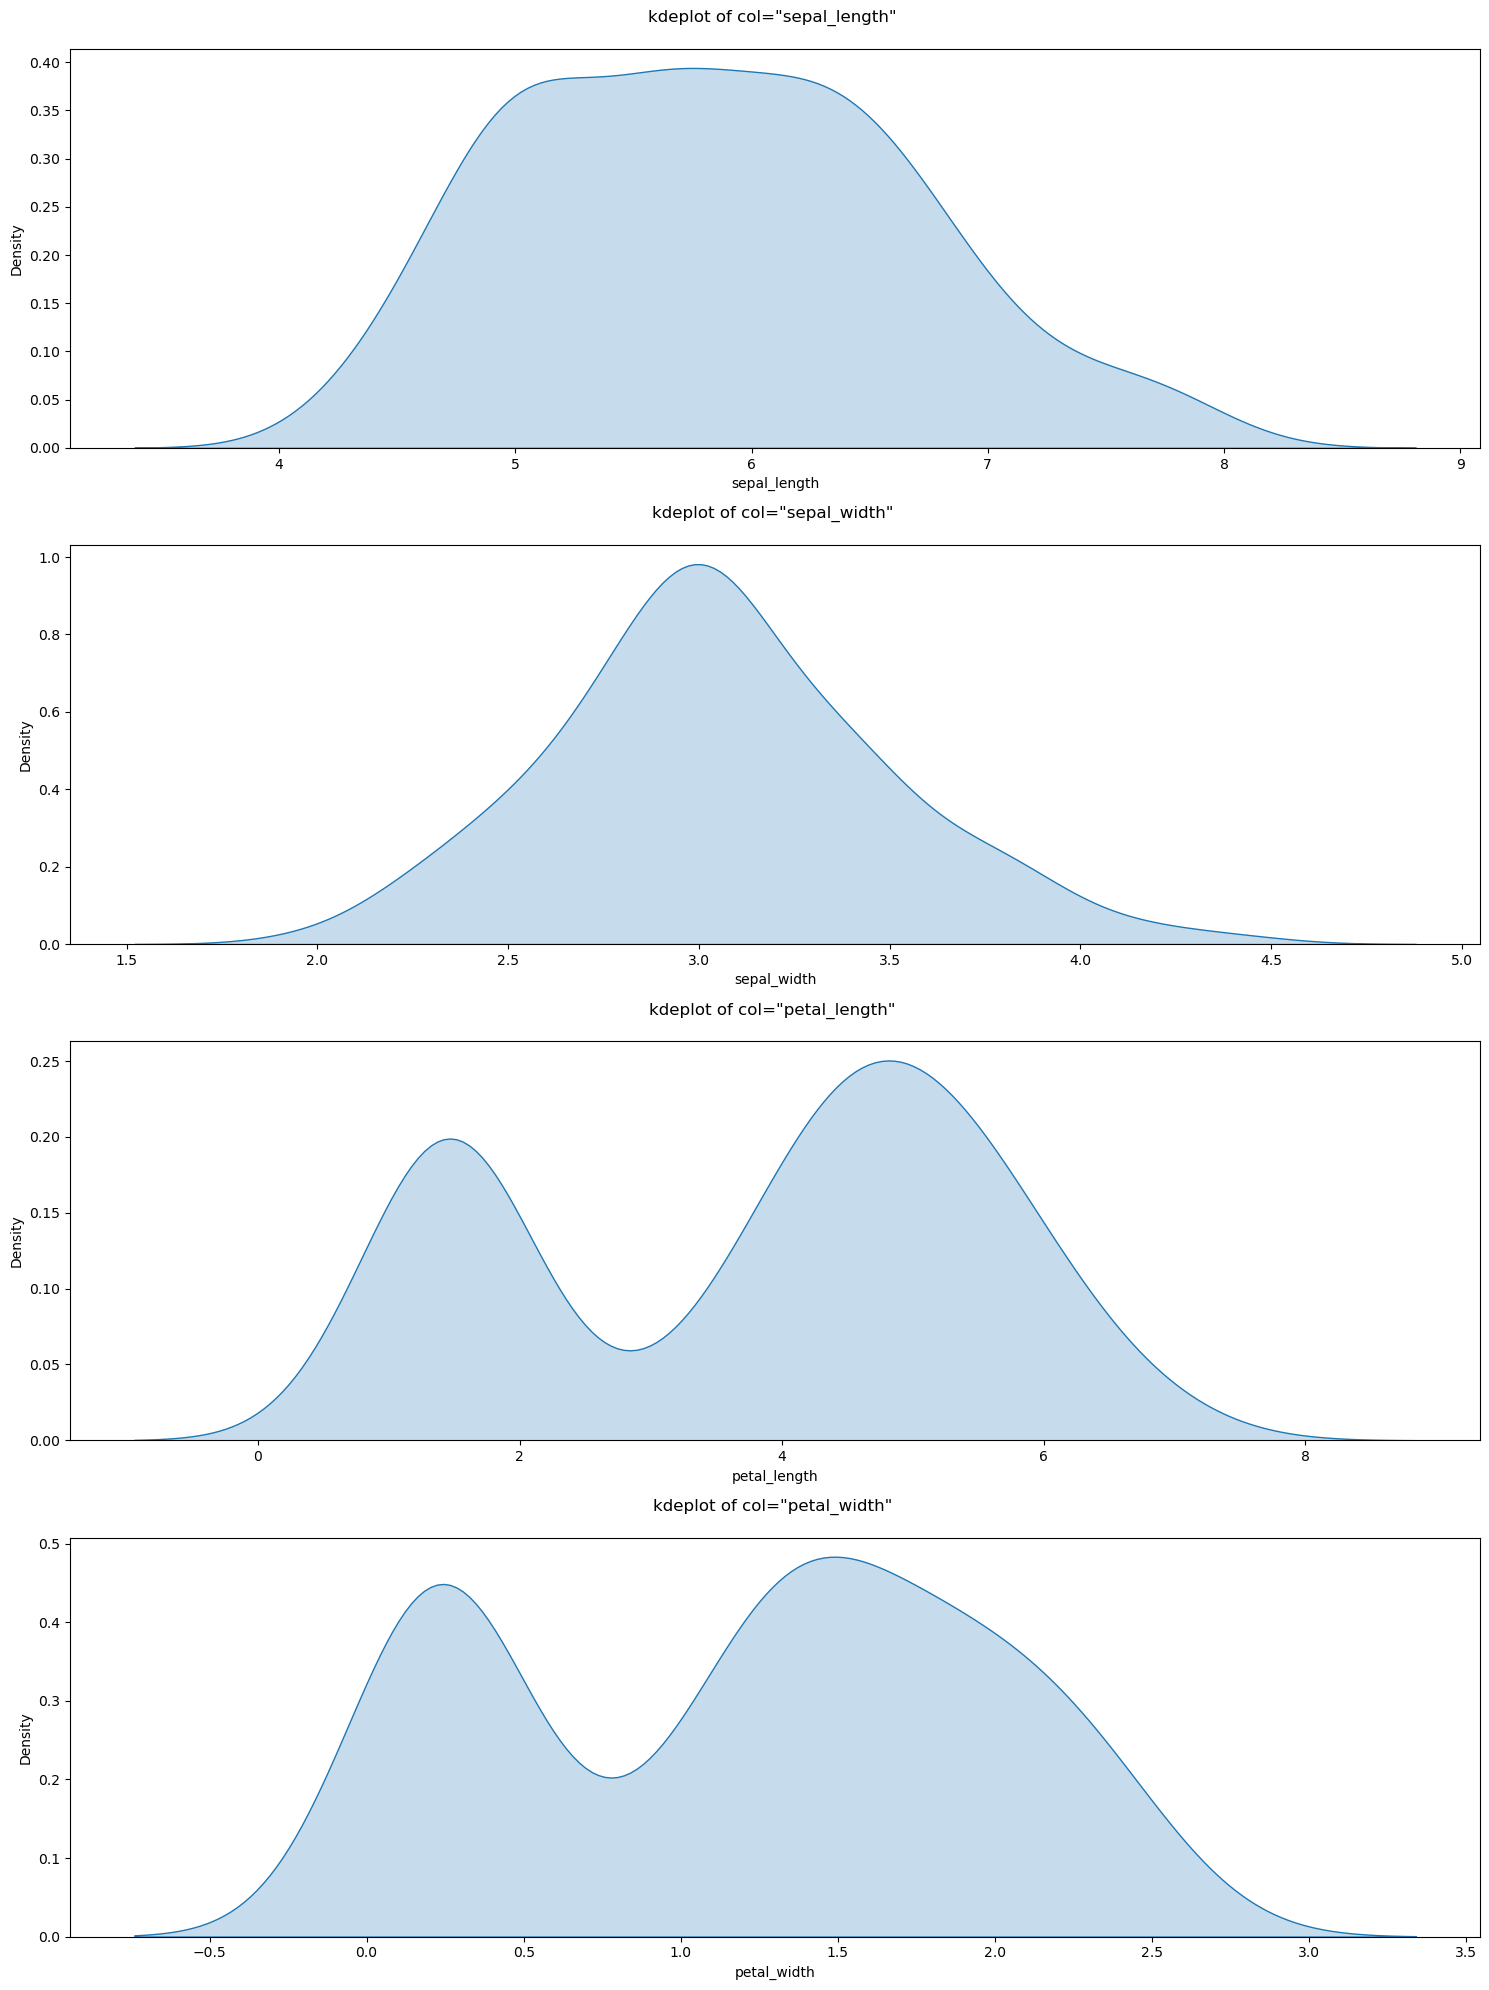

In [16]:
show_kdeplots(iris,features)

In [24]:
def show_histplots(data,cols,hue=None):
    
    N = len(cols)
    
    plt.figure(figsize=(15, 5*N))
    
    for i in np.arange(N):
        col = cols[i]
        
        plt.subplot(N, 1, i+1)
        plt.title(f'kdeplot of col= "{col}") \n')
        
        
        ax = sns.histplot(data=iris, x=col, hue=hue, fill=True, element = "step")
        plt.tight_layout()
        
    plt.show()

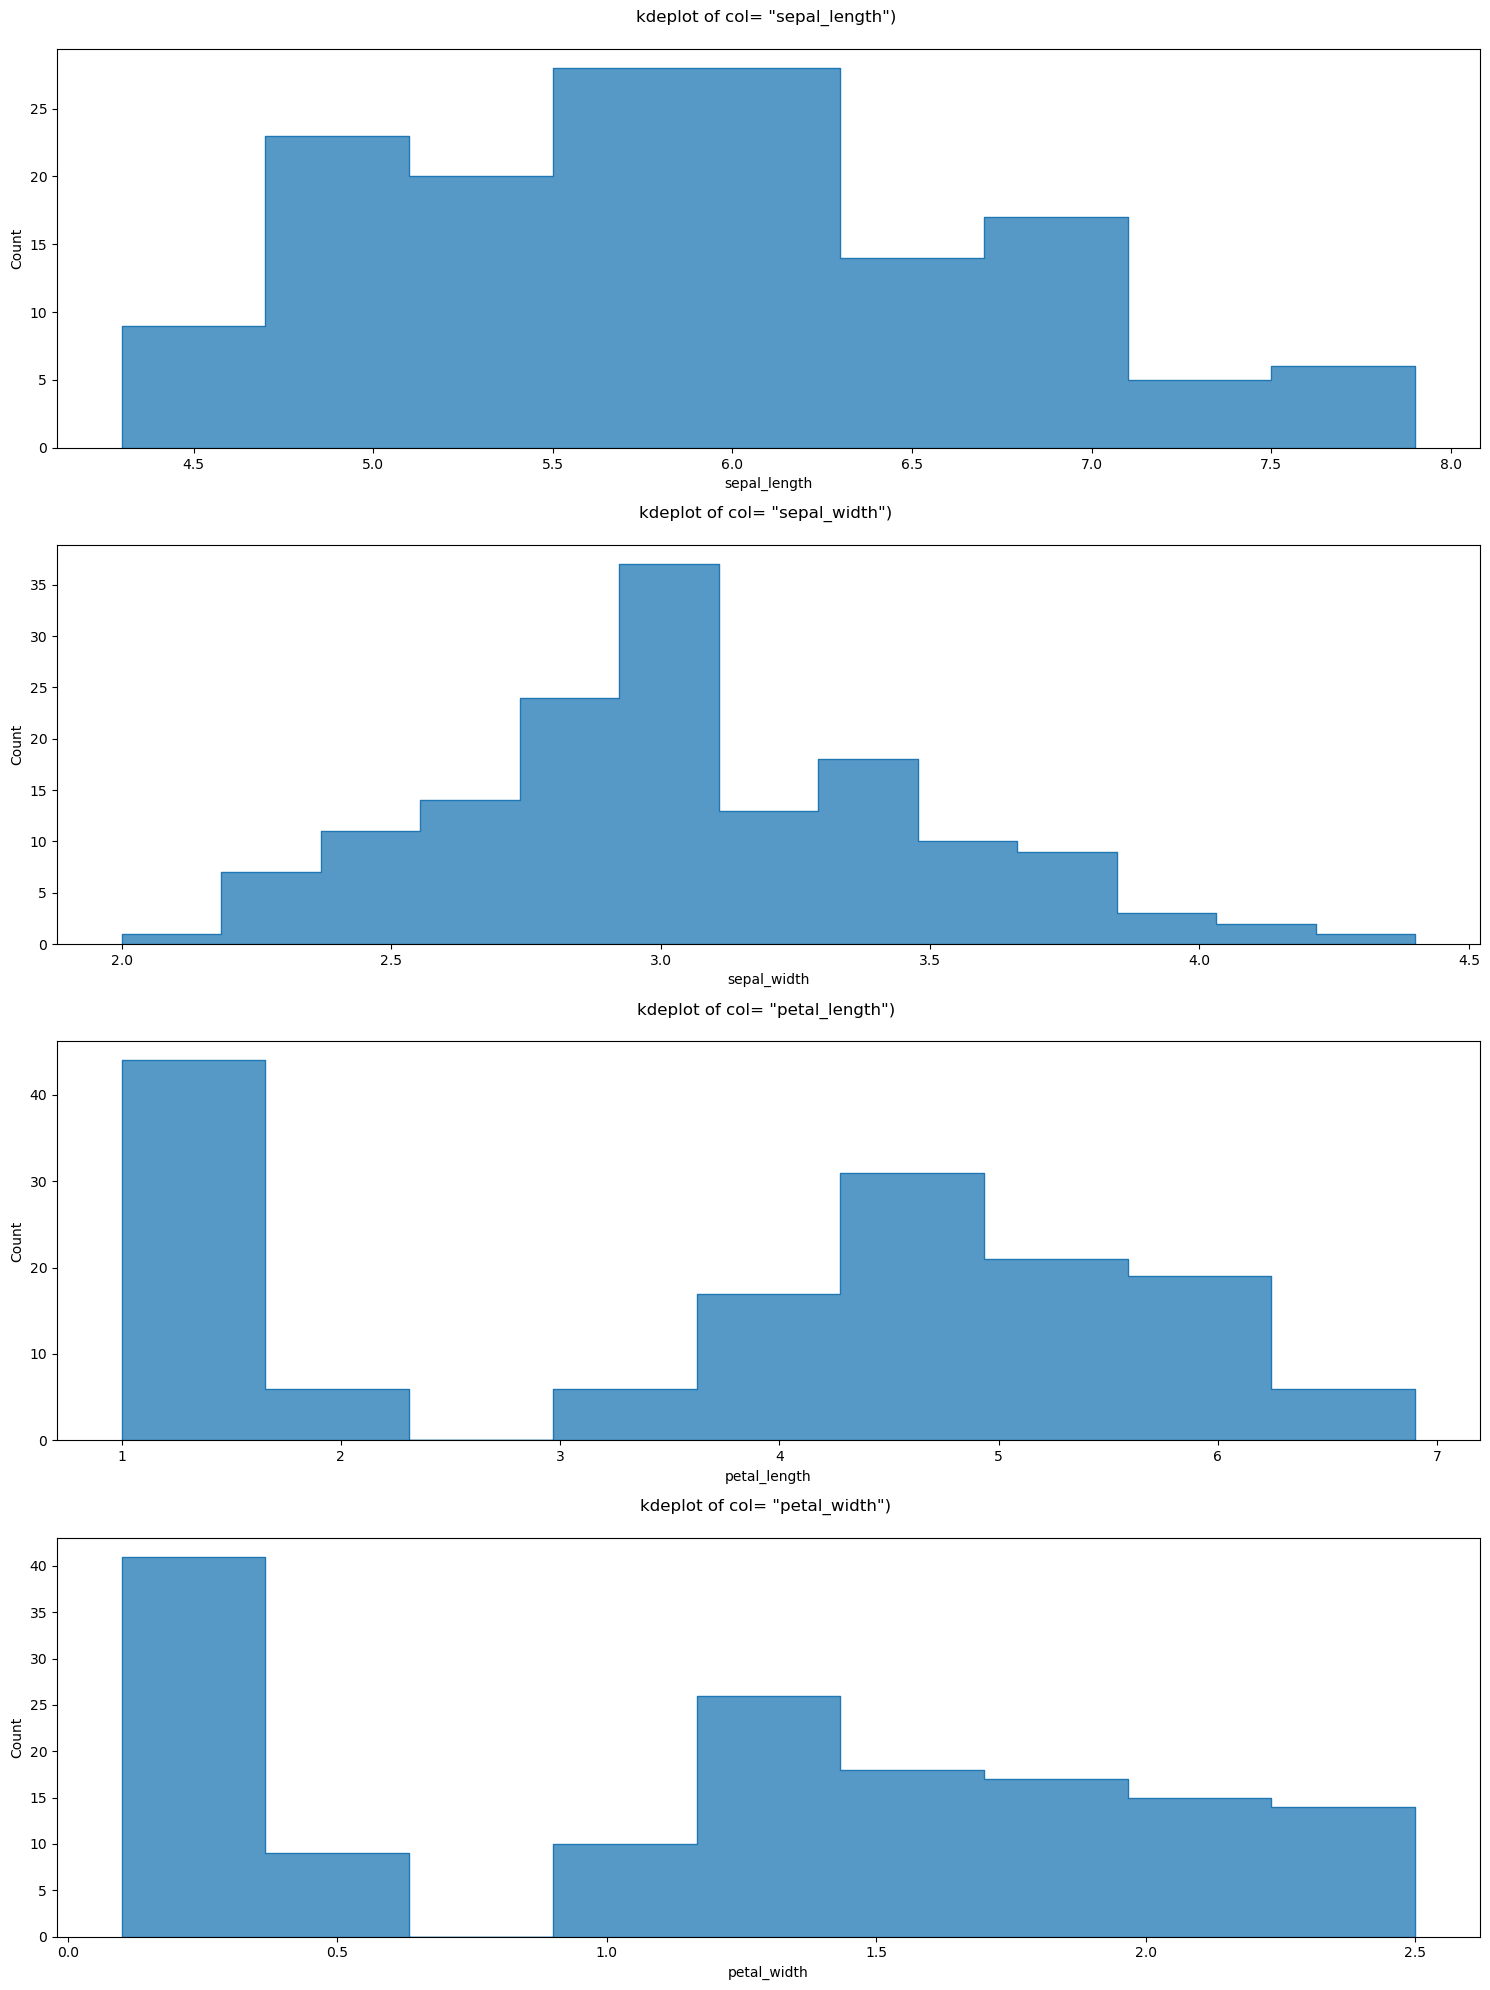

In [25]:
show_histplots(iris, features)

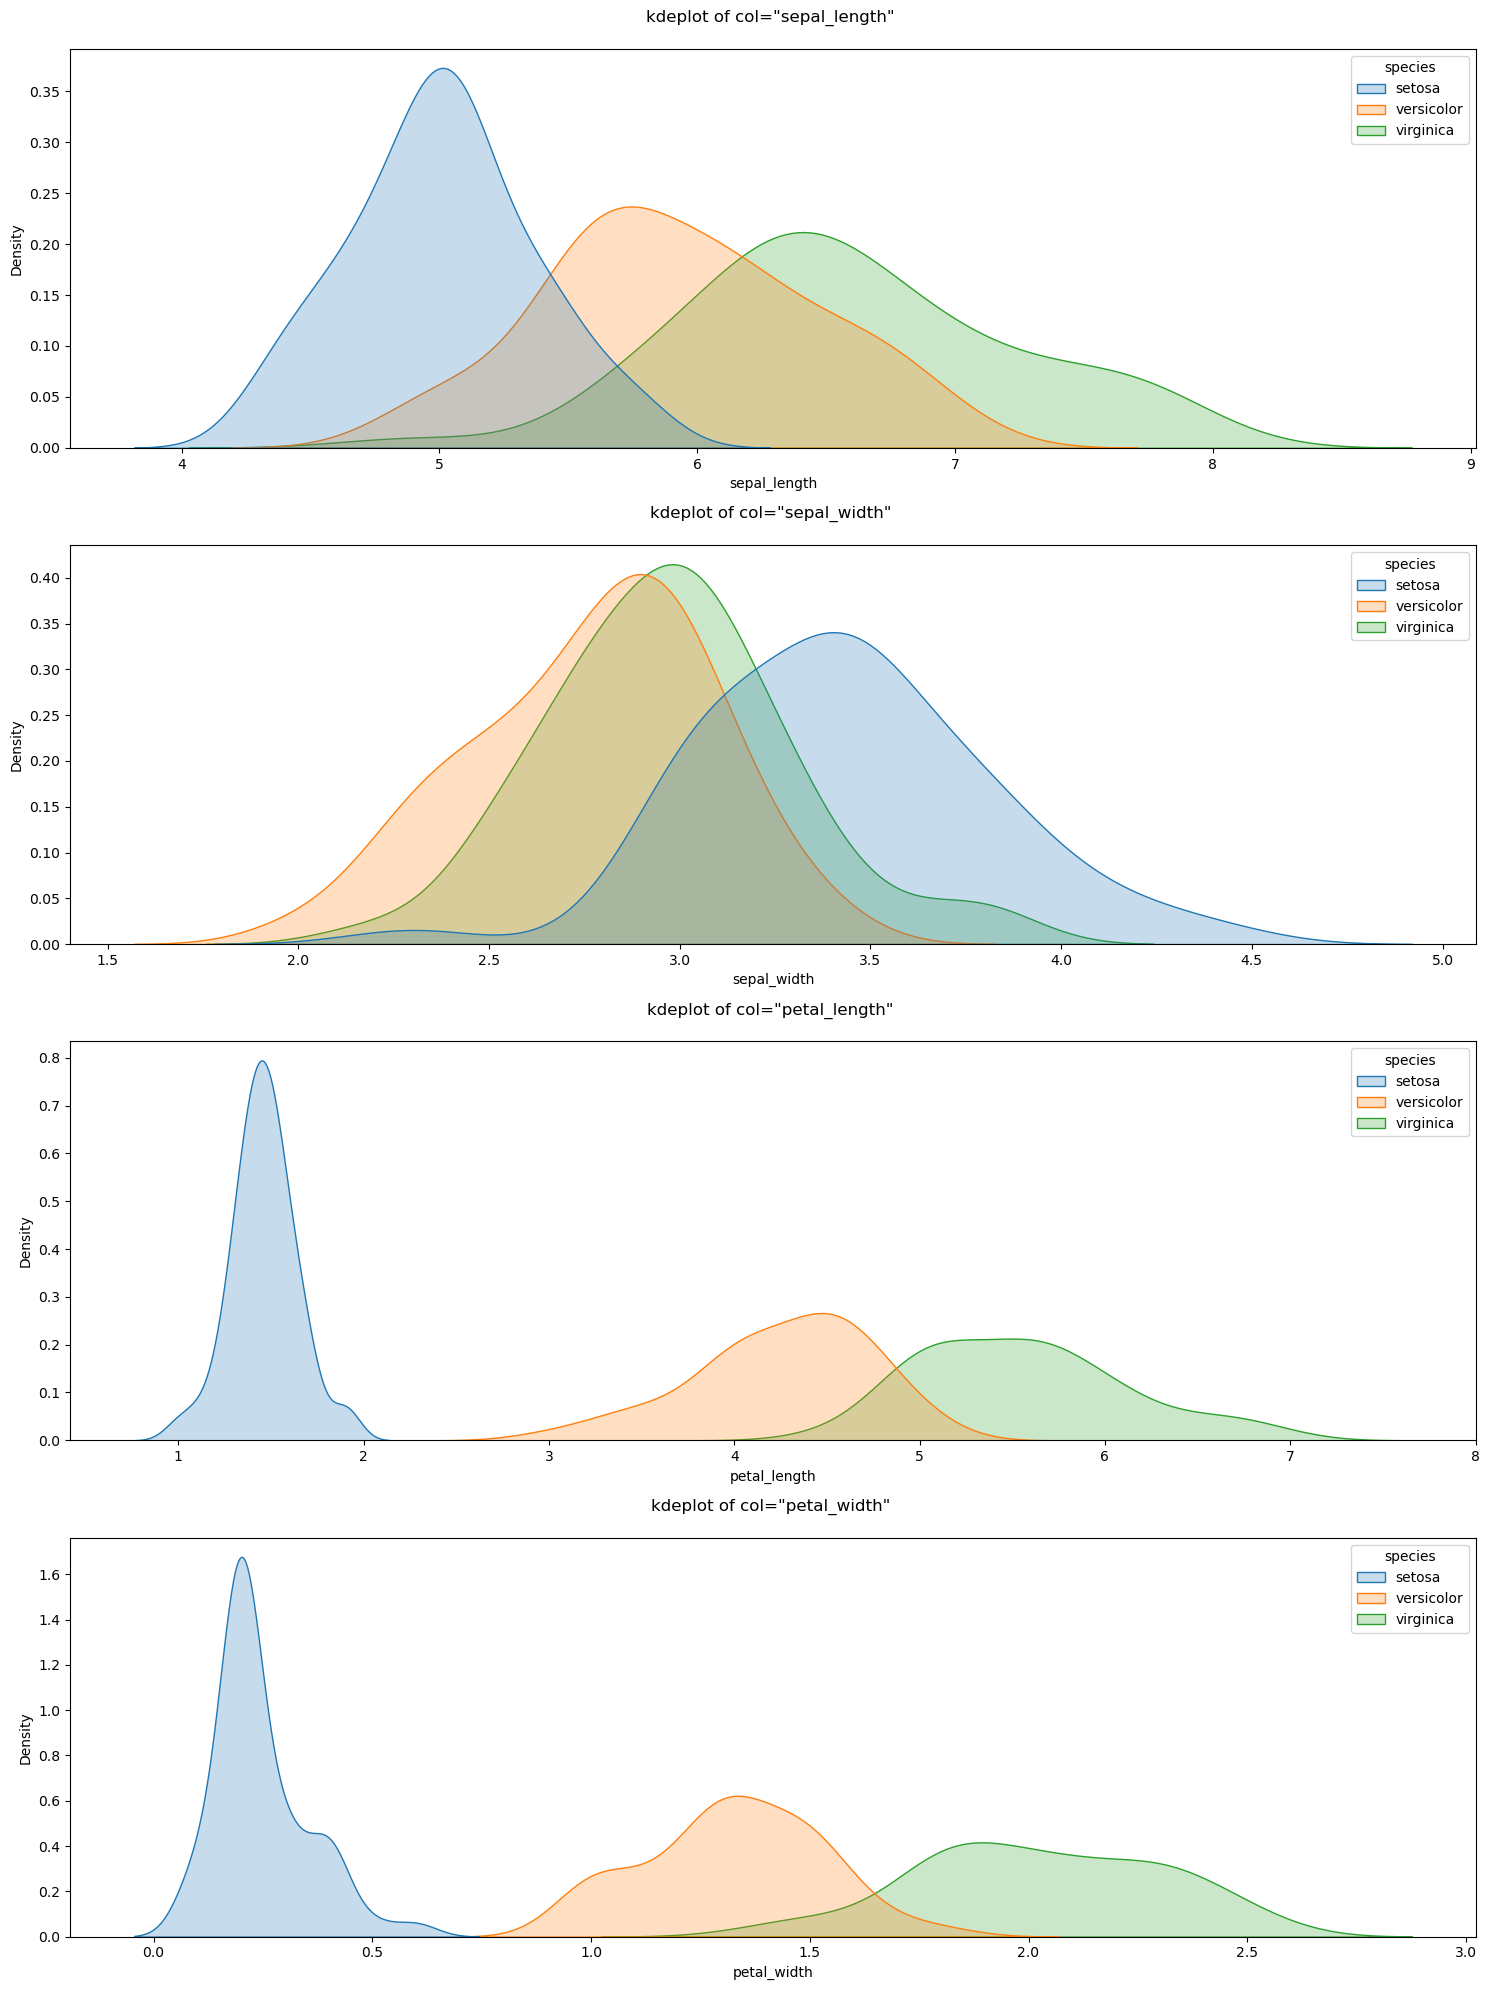

In [26]:
show_kdeplots(iris,features, hue = target)

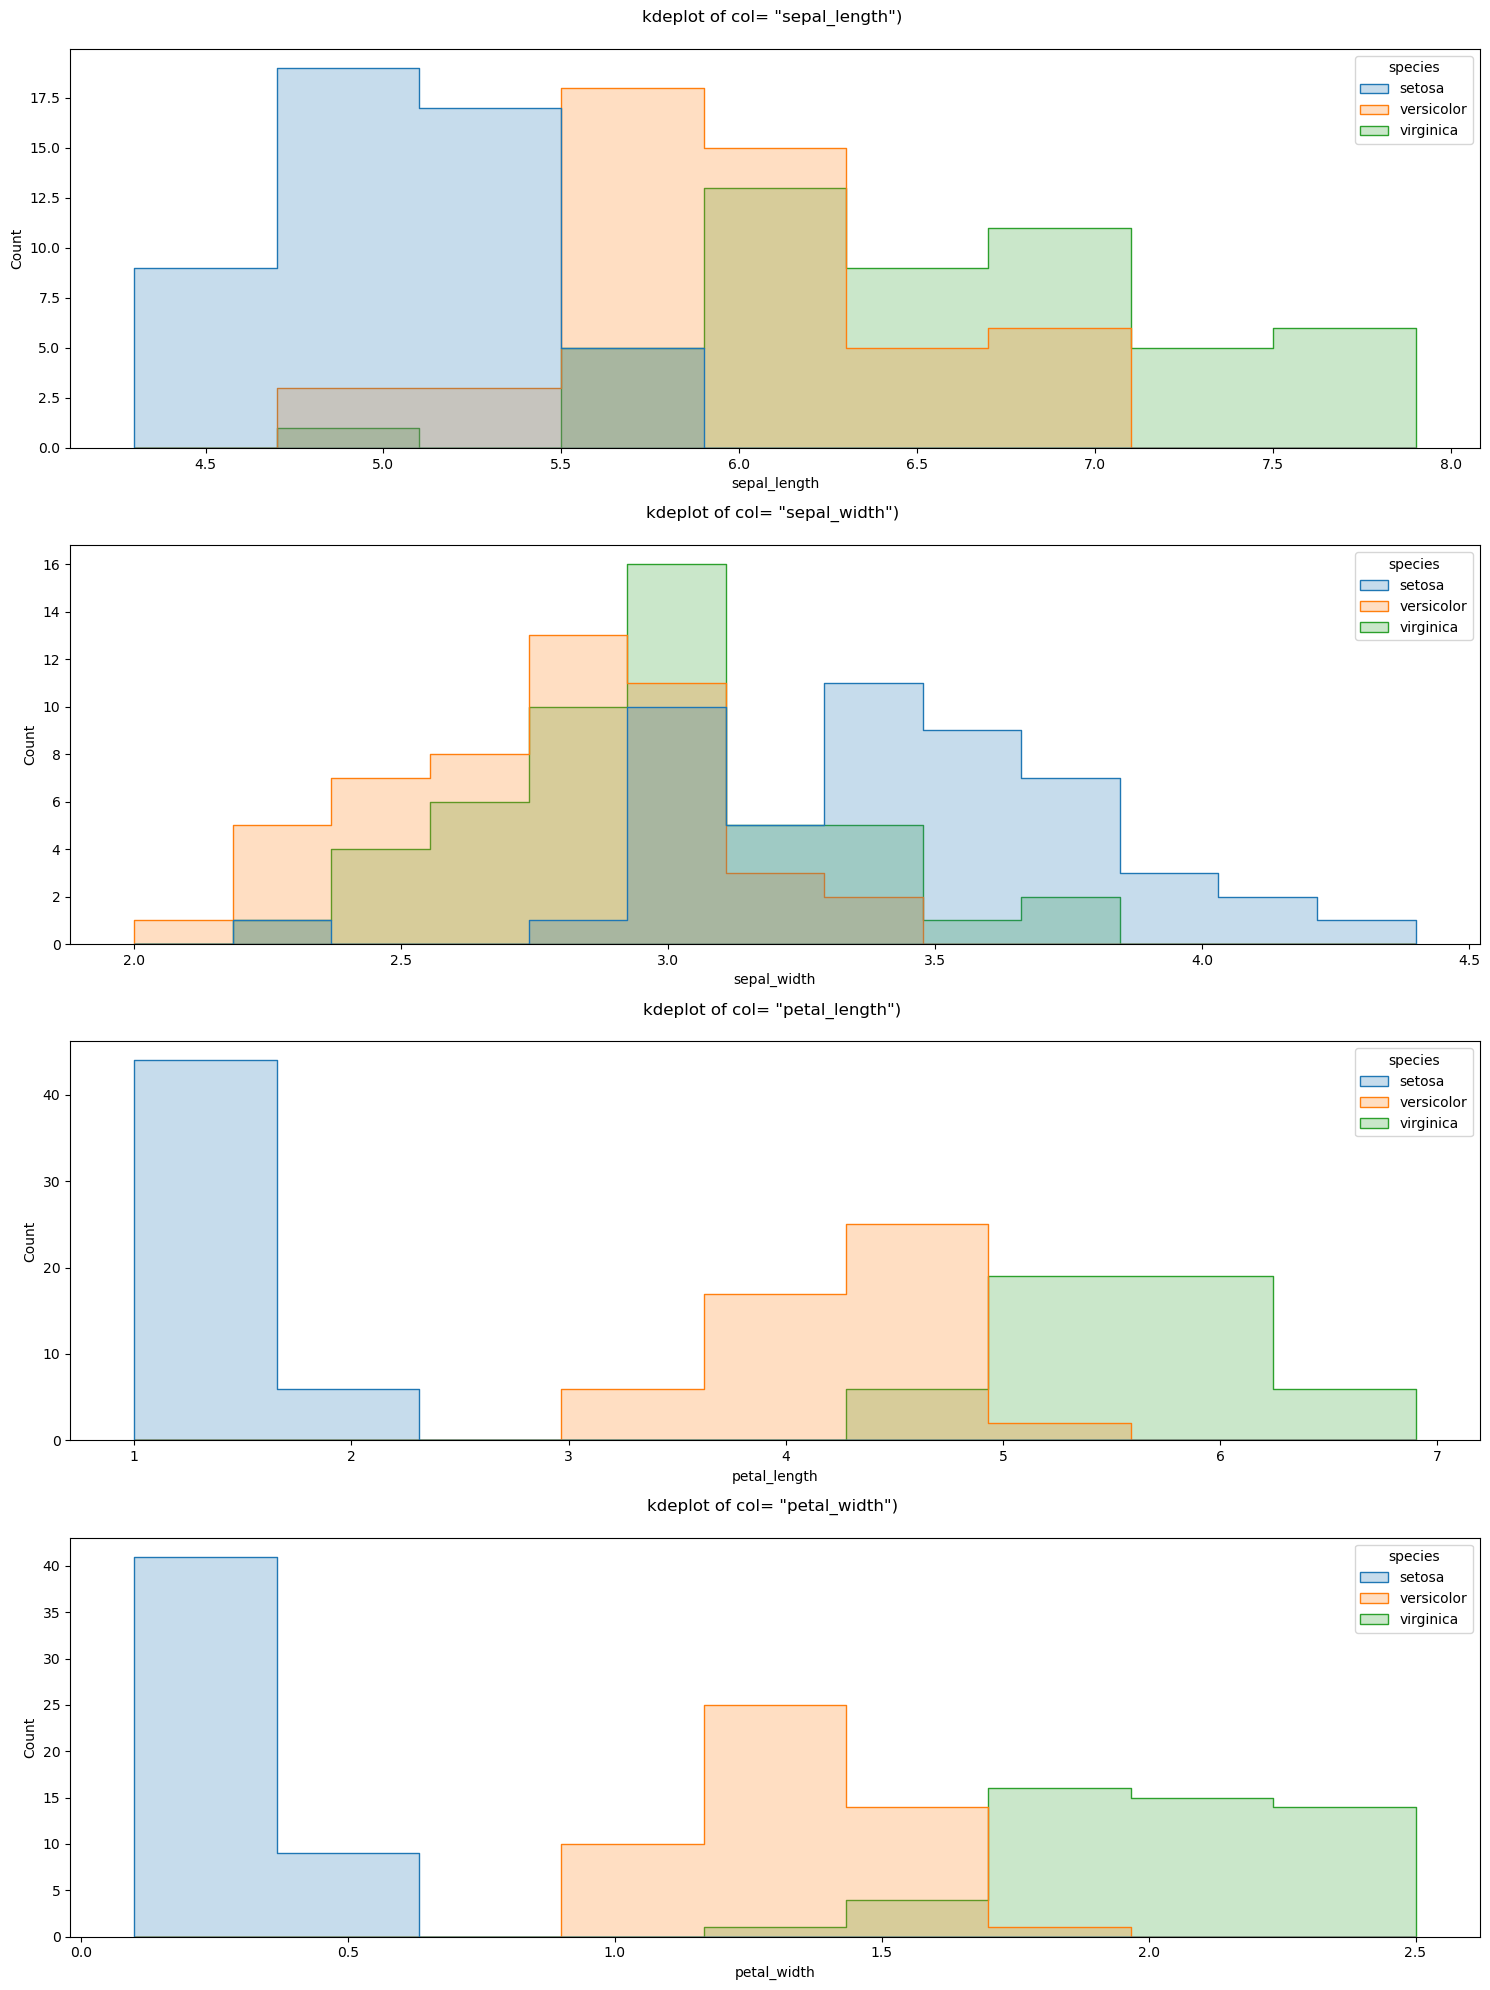

In [27]:
show_histplots(iris,features, hue = target)

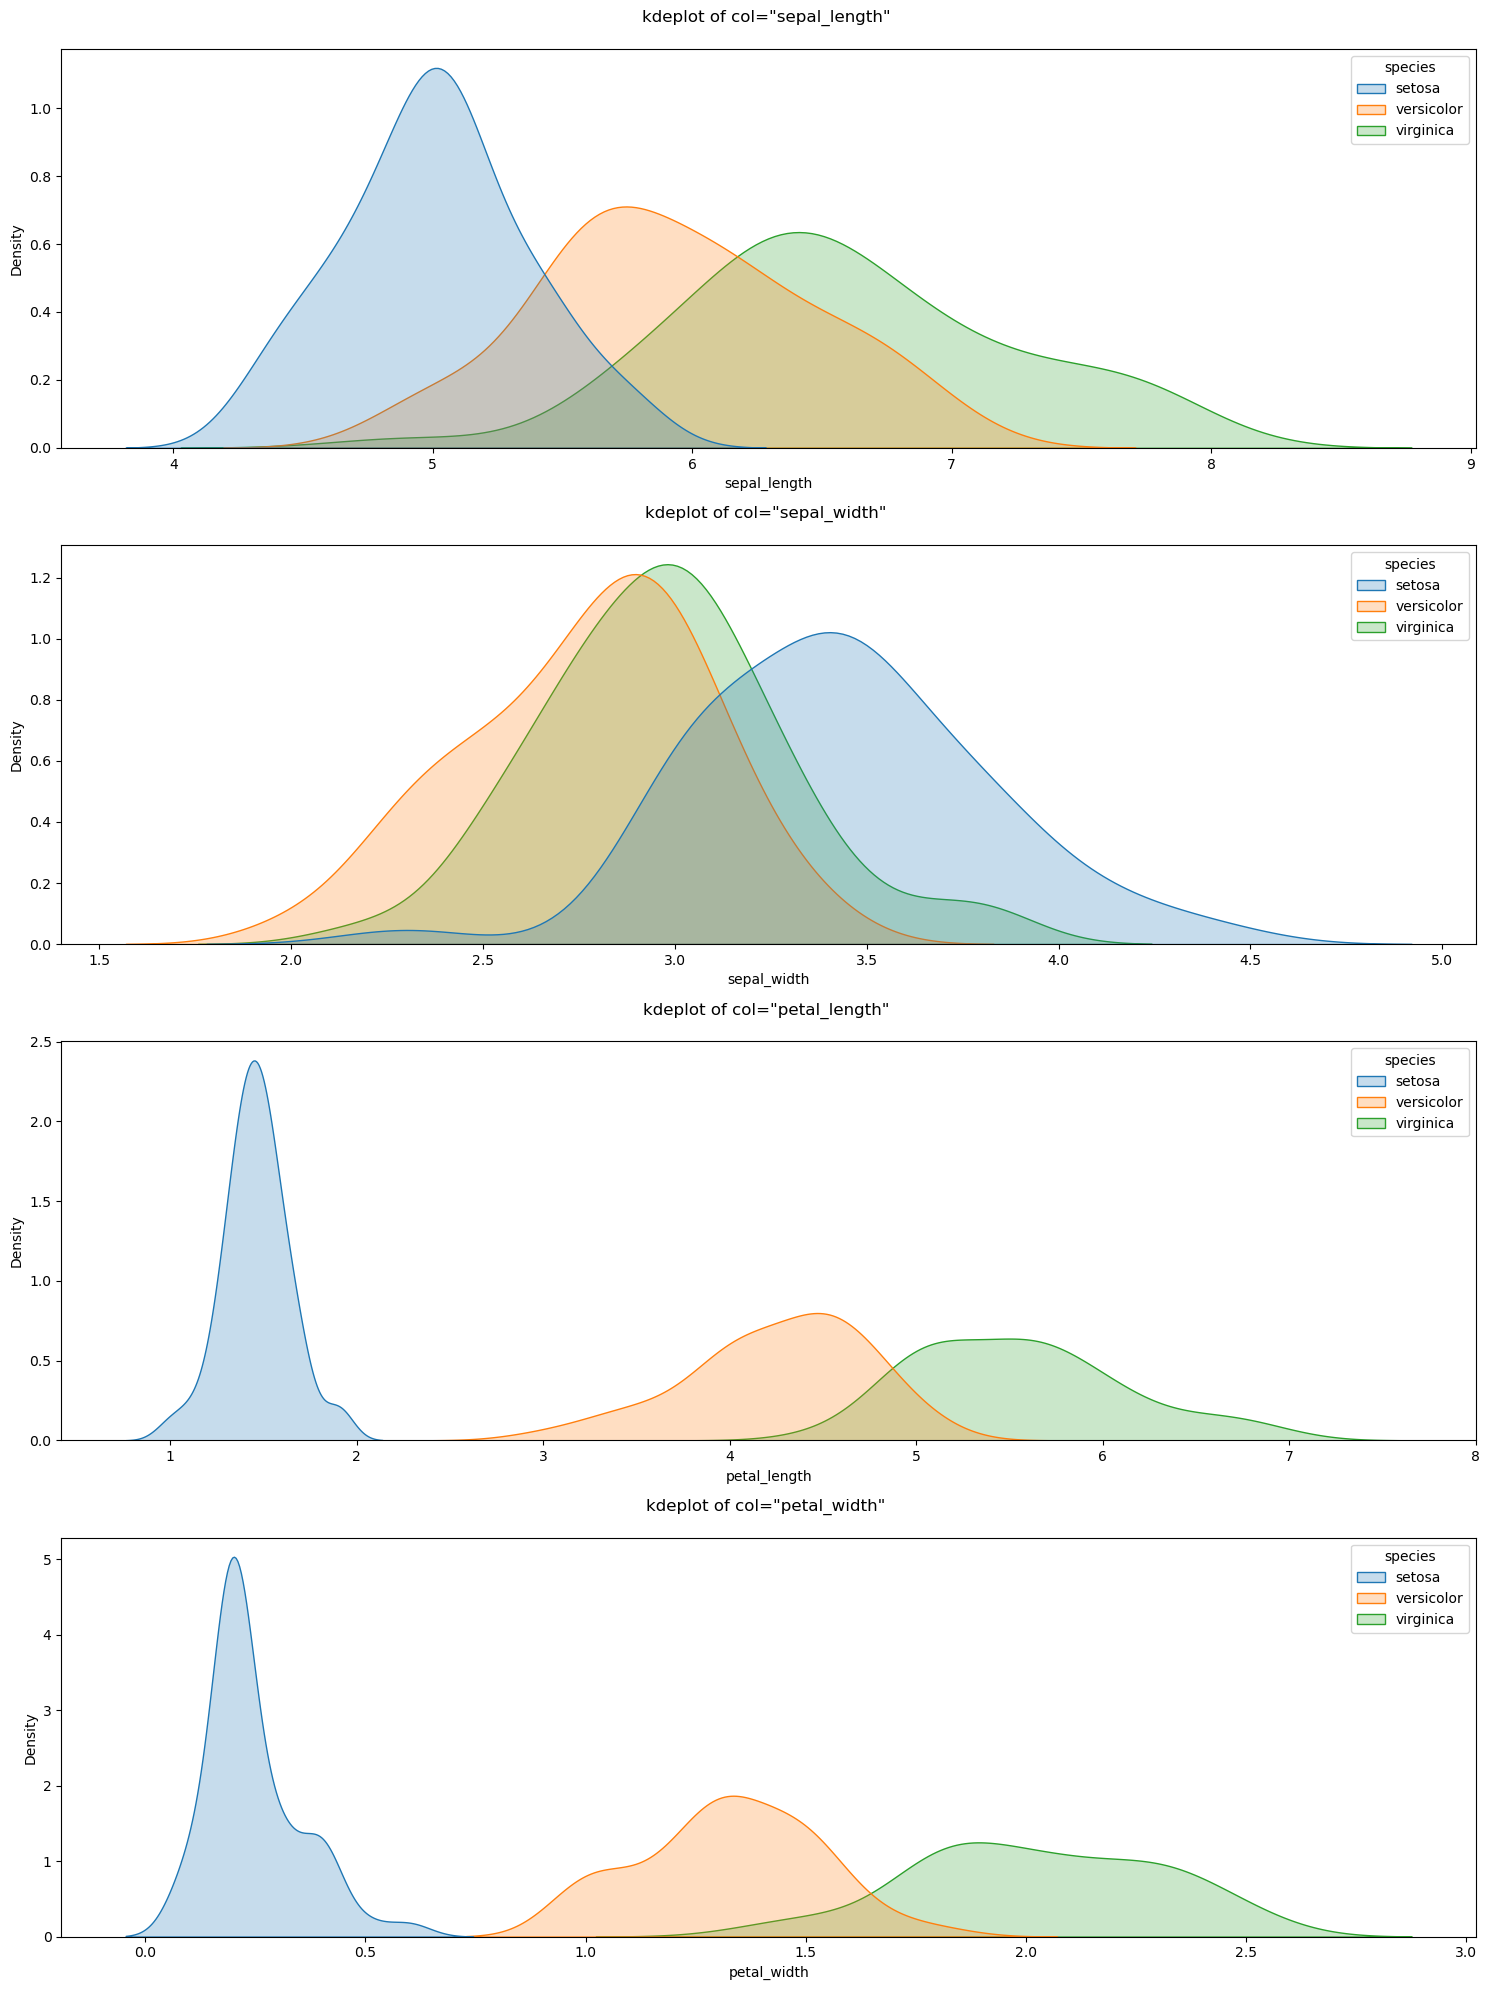

In [28]:
cols = features
hue = target

N = len(cols)

plt.figure(figsize = (15, 5*N))
for i in np.arange(N):
    col = cols[i]
    
    
    plt.subplot(N, 1, i+1)
    plt.title(f'kdeplot of col="{col}" \n')
    
    ax = sns.kdeplot(data=iris,
                    x=col,
                    hue=hue,
                    fill=True,
                    common_norm=False
                    )
    plt.tight_layout()
    
plt.show()

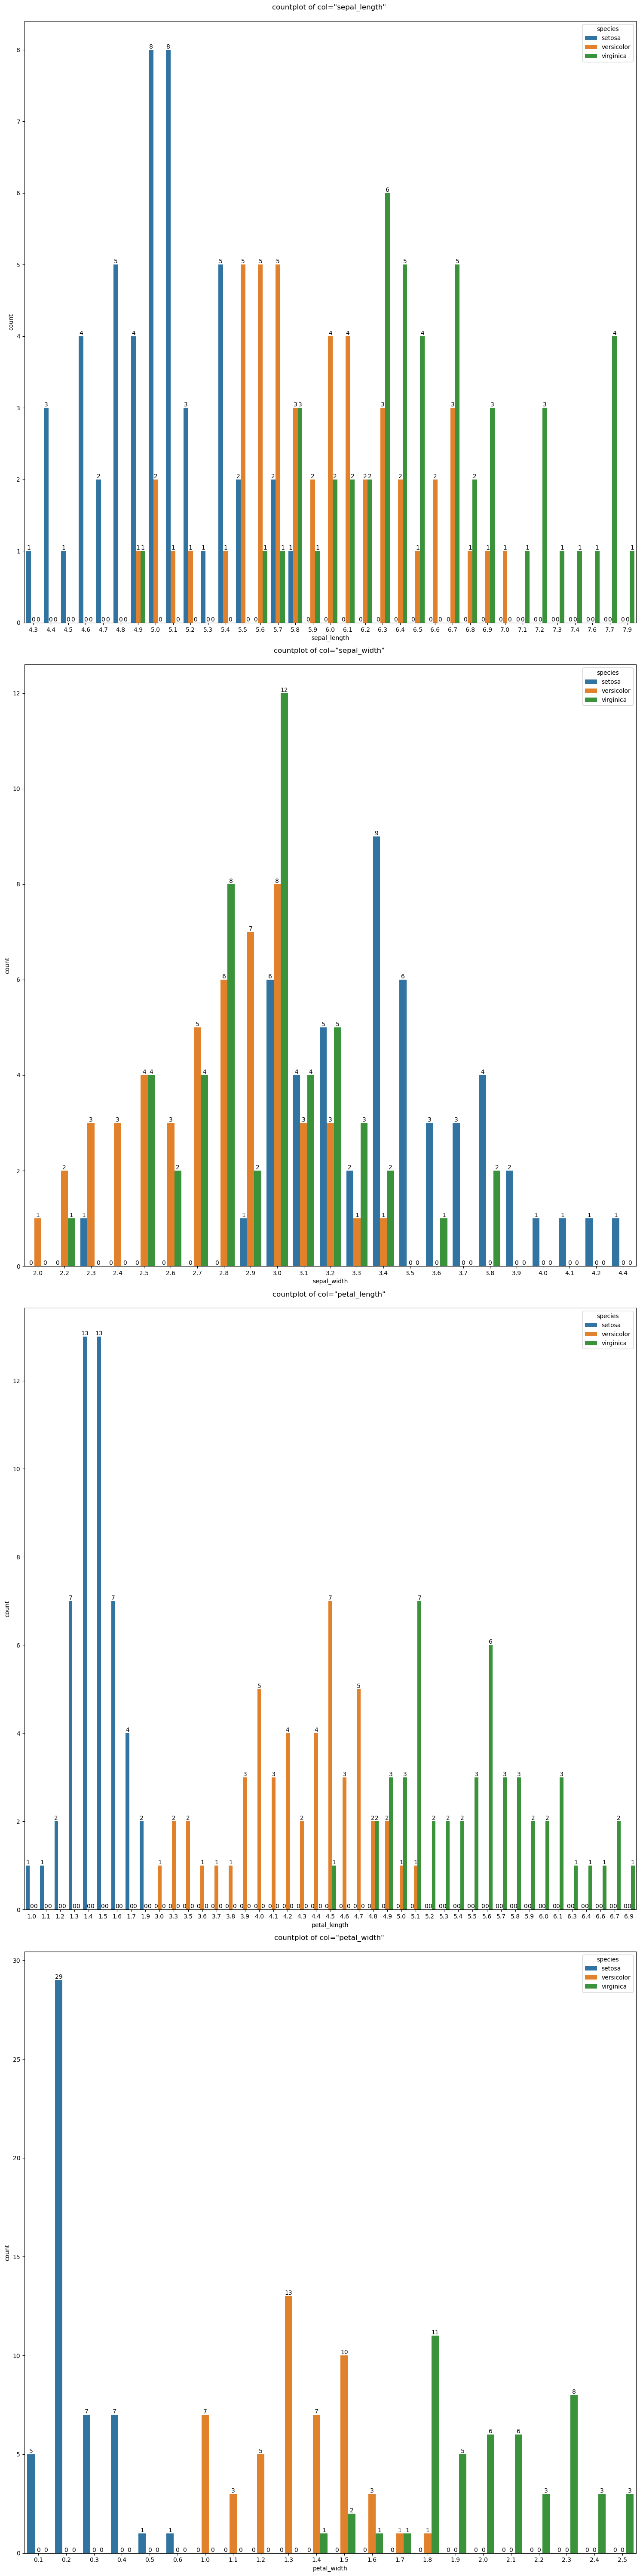

In [29]:
show_countplots(iris, features, hue=target)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_11280\3271715997.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris[[target]+features].corr()


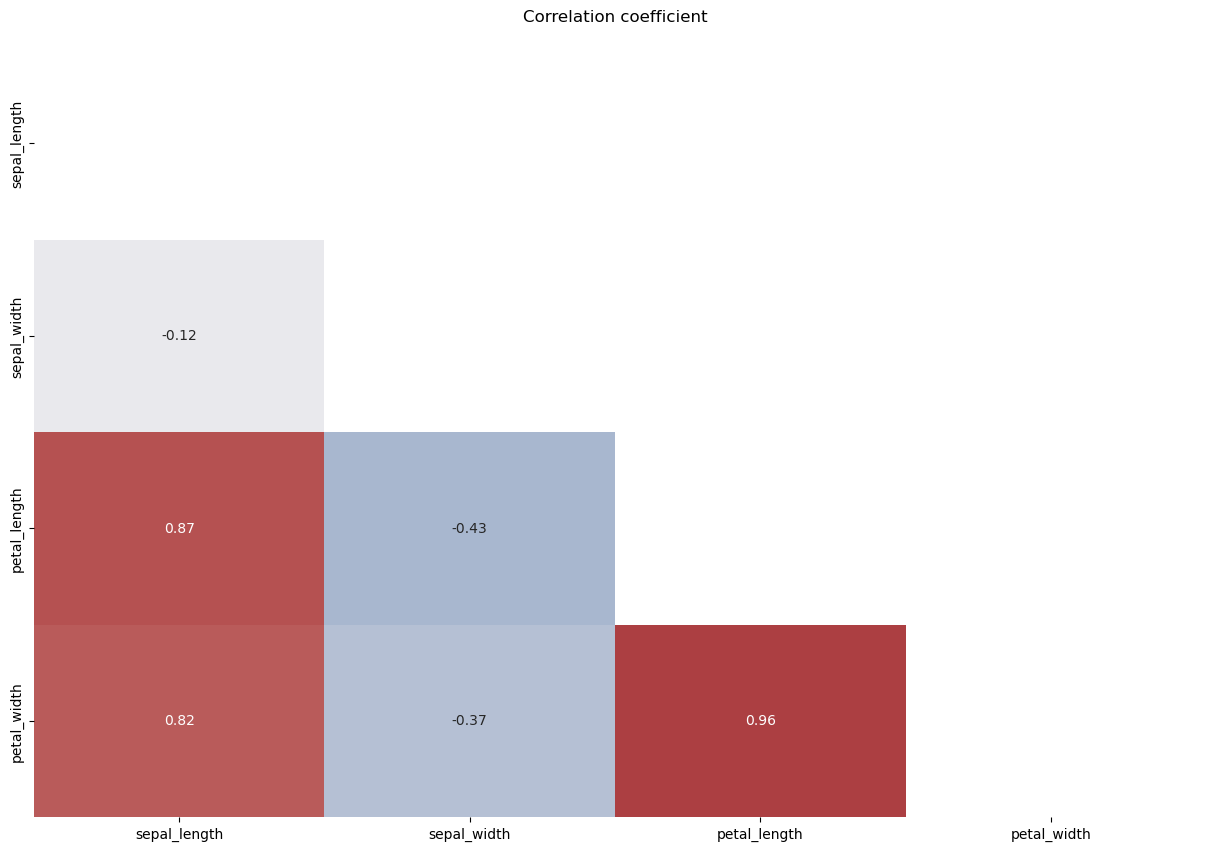

In [30]:
plt.figure(figsize=(15,10))
plt.title("Correlation coefficient\n")

###
## correlation data

corr = iris[[target]+features].corr()

## mask = hide
mask = np.zeros_like(corr, dtype=bool)

mask[np.triu_indices_from(mask)] = True

###
sns.heatmap(
    np.round(
        corr
        ,2)
    , annot=True
    , cmap='vlag'
    , cbar=False
    , vmin=-1
    , vmax=1
    , mask = mask #~mask
)

plt.show()

<Axes: xlabel='petal_width', ylabel='sepal_width'>

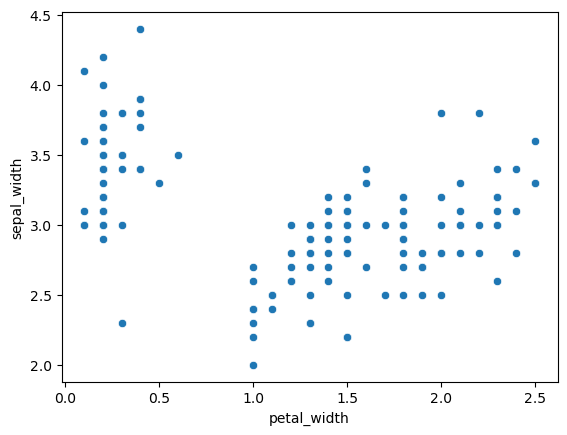

In [32]:
sns.scatterplot(iris, x='petal_width', y ='sepal_width')